# Dimensionality Reduction Methods

Aaron Balke

S# 011005116

# Presentation

https://youtu.be/DxkNVDde-Qo

# Part I: Research Question

## A1. Question

For this assessment, my Research Question is, "What is the minimum amount of components required to capture 80% of the variance in the dataset?".

## A2. Goal

The goal of this analysis is to maintain a high level of variance while lowering the dimensionality. This will simplify future analysis, increasing efficiency. We are aiming specifically for a variance of 80% or more, while significantly lowering the number of features.

# Part II: Method Justification

## B1. PCA Explanation

Principal Component Analysis is an unsupervised machine learning process to reduce the dimensionality of a dataset. This is completed through feature extraction. In PCA this process is completed by creating new combination variables of the original features. These new combinations are smaller uncorrelated variables that still provide as much variance data as possible. Using PCA will remove correlating variables, lowering overfitting, remove lower variance variables, loweing model complexity, and keep most of the accuracy/precision of the data and model. The hope is to go from having 7 variables to run analysis against to having just 3-4 Principal Components that explain most of the variance for future analysis.

## B2. Assumption

PCA assumes linearity between variables. When mapping the higher dimensional original data to the reduced principal components, PCA uses matrix multiplication, a linear operation. This means if the data is linear or close to linear, PCA will effectively reduce the data, and as the data becomes less linear, the effectiveness of the dimensional reduction diminishes. (Linearity of PCA)


# Part III: Data Preparation

## C1. Continuous Variables

| Feature            |
|:-------------------|
| Lat                |
| Lng                |
| Income             |
| VitD_levels        |
| Initial_days       |
| TotalCharge        |
| Additional_charges |

## C2. Standardization

The standardization process will set the magnitude of all the variables to be the same, giving each feature a standard deviation of 1, and a mean of 0. This is required to not skew the data with large range variables.

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Imports
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('./medical_clean.csv')

In [2]:
# Keep only continuous variables
df = df[['Lat', 'Lng', 'Income', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Additional_charges']]

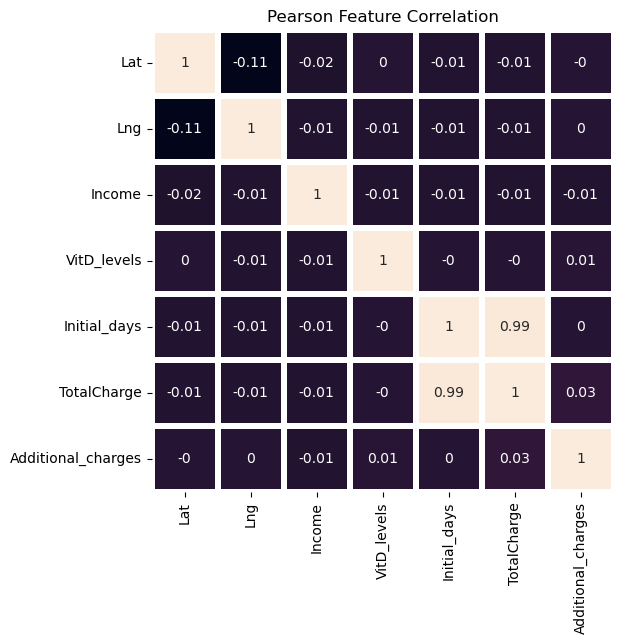

In [3]:
# Check Feature Correlation of Variable to All Variables
plt.figure(figsize=(6,6))
cor = df.corr().round(2)
sns.heatmap(cor, annot=True, square=True, linewidths=3, cbar=False)
plt.title('Pearson Feature Correlation')
plt.show()

In [4]:
# Remove Features with heavy correlation
df.drop('TotalCharge', inplace=True, axis=1)

In [5]:
# Scale Data, then convert from np array to DataFrame
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Verify Scaling (Should have Std of 1 or very close to, and Mean equal to 0)
print(scaled_df.std().round(2))
print(scaled_df.mean().round(2))

#Export Data
scaled_df.to_csv('d212_task2_clean.csv', index=False)

Lat                   1.0
Lng                   1.0
Income                1.0
VitD_levels           1.0
Initial_days          1.0
Additional_charges    1.0
dtype: float64
Lat                  -0.0
Lng                   0.0
Income                0.0
VitD_levels          -0.0
Initial_days         -0.0
Additional_charges   -0.0
dtype: float64


# Part IV: Analysis

## D1. Component Matrix

The Loadings Matrix provides the correlation between each feature and the principal components.

In [6]:
# Create PCA Object, then fit and tranform the scaled data
pca = PCA(n_components=6)
pca.fit(scaled_df)
pc = pca.transform(scaled_df)

columns = ['PC1','PC2','PC3','PC4','PC5','PC6']

# Convert to Dataframe
df_pca_components = pd.DataFrame(pc, columns=columns)

# Create PCA Loading Matrix
loadings_matrix = pd.DataFrame(pca.components_.T, columns=columns, index=df.columns)
loadings_matrix.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6
Lat,0.71,0.03,-0.03,-0.01,-0.13,-0.69
Lng,-0.70,-0.09,-0.05,-0.09,-0.15,-0.69
Income,-0.09,0.64,-0.08,0.43,0.60,-0.17
VitD_levels,0.06,-0.46,-0.58,-0.27,0.61,-0.05
Initial_days,0.01,-0.34,0.80,-0.04,0.48,-0.13
Additional_charges,-0.00,-0.50,-0.11,0.85,-0.10,-0.02


## D2. Identify Principal Components

Using the Kaiser Rule, we will keep Components with a EigenValue > 1 since these are significant, and one with < 1 are discarded. This leaves us with 3 Principal Components to use.

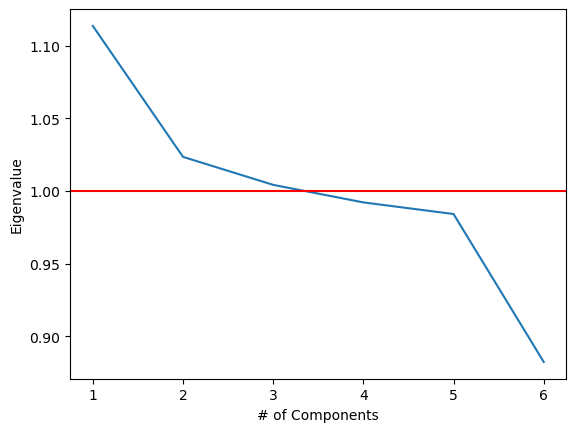

EigenValues for each Principal Component Amount
PC1:	1.1135
PC2:	1.0235
PC3:	1.0042
PC4:	0.9922
PC5:	0.9842
PC6:	0.8825


In [7]:
# Covariance matrix and Eigenvalues are calculated according to the Kaiser rule
# Finds how closely aligned the pca components and normalized feature values are
coVar_matrix = np.dot(scaled_df.T, scaled_df) / df_pca_components.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(coVar_matrix, eigenvector))
               for eigenvector in pca.components_]

# Plot
plt.plot(eigenvalues)
plt.ylabel('Eigenvalue')
plt.xticks(np.arange(len(eigenvalues)), np.arange(1, len(eigenvalues)+1))
plt.xlabel('# of Components')
plt.axhline(y=1, color='red')
plt.show()

# Print Eigenvalues for exact values
print("EigenValues for each Principal Component Amount")
for i, value in enumerate(eigenvalues):
    print(f"PC{1+i}:\t{round(value, 4)}")

## D3. Identify Variance

For each component, variance is provided individually and as a cumulative value to better understand each component in relation to the other ones.

In [9]:
# Get Variance Explanation of Each Principal Component

print(f"Explained Variance for Each Principal Component\n")
print(f"Component\tExplained Var\tCumulative Explained Var\n")

cev_component = []
cev = 0
chosen = 0

for i, pc in enumerate(loadings_matrix.columns):
    component_variance = (pca.explained_variance_ratio_[i] * 100)
    cev = cev + component_variance
    cev_component.append(cev)
    print(f"{pc}\t\t{component_variance.round(2)} %\t\t{cev.round(2)} %")
    
    # Set the cumulative variance at our chosen # PCs to be the chosen variable for D4
    if i == 2:
        chosen = cev

Explained Variance for Each Principal Component

Component	Explained Var	Cumulative Explained Var

PC1		18.56 %		18.56 %
PC2		17.06 %		35.62 %
PC3		16.74 %		52.35 %
PC4		16.54 %		68.89 %
PC5		16.4 %		85.29 %
PC6		14.71 %		100.0 %


## D4. Total Variance


In [10]:
print("For the Principal Components identified by Eigenvalues (PC1, PC2, PC3),")
print(f"The Cumulative Explained Variance is {chosen.round(2)} %")

For the Principal Components identified by Eigenvalues (PC1, PC2, PC3),
The Cumulative Explained Variance is 52.35 %


## D5. Results

Unfortunately, our Principal Component Analysis left us with variables that only explain 52% of the variance, when we required 80% for our research question. By evaluating the explained variance of each component in D3, we can see each component sits at around 15-18%, there is not a set of components that explain most of the variance. Additionally, by evaluating the cumulative explained variance, we can see that it would take 5 Principal Components to score higher than 80% on the cumulative explained variance. 5 Principal Components to explain 80% of the variance, when compared to the original 7 variables (6 after correlation removal) is not a major difference for the size of our dataset. Beyond these findings, the 3 principal components that explain 52% of our variance can be used for the further reduction of the dataset.

## E. Web Sources

Important note: Most of the PCA Analysis is ripped directly from my D206, I have included the sources below that I used for D206.

Nehme, A. (n.d.). Cleaning Data in Python [Cleaning Data in Python]. Datacamp. Retrieved December 26, 2023, from https://www.datacamp.com/courses/dealing-with-missing-data-in-python

Boeye, J. (n.d.). Dimensionality Reduction in Python [Dimensionality Reduction in Python]. Datacamp. Retrieved December 26, 2023, from https://www.datacamp.com/courses/dimensionality-reduction-in-python

Brems, M. (2019, June 10). A one-stop shop for principal component analysis. Medium. Retrieved December 26, 2023, from https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c 

The WGU Resources, Section 3 Lesson 7, which outlines PCA analysis in Python. Available here:
https://cgp-oex.wgu.edu/courses/course-v1:WGUx+OEX0026+v02/courseware/1f468770545f494fa657b4dc0ed3762f/2b5f23c5dad64357b352728993788677/6?activate_block_id=block-v1:WGUx+OEX0026+v02+type@vertical+block@3f0422d47d8b4a3eaec25de3bced8bf8

Python MatplotLib plot x-axis with first x-axis value labeled as 1 (instead of 0). (n.d.). Stack Overflow. Retrieved December 26, 2023, from https://stackoverflow.com/questions/28288383/python-matplotlib-plot-x-axis-with-first-x-axis-value-labeled-as-1-instead-of-0

## F. Other Sources

Linearity of PCA. (n.d.). Cross Validated. Retrieved December 29, 2023, from https://stats.stackexchange.com/questions/290750/linearity-of-pca

Cross Validated. normalization - Why do we need to normalize data before principal component analysis (PCA)? (n.d.). Cross Validated. https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca